In [19]:
from utils.clustering import (
    dijkstra,
    jerarquico_aglomerativo,
    distancia_minkowski
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import Literal
import networkx
from fcmeans import FCM
from IPython.display import display
from sklearn.datasets import (
    make_moons,
    make_circles
    )
from mpl_toolkits.mplot3d import Axes3D

## Problema 2

In [3]:
prueba = {'A': {'B': 1, 'C': 4},
          'B': {'A': 1, 'C': 2, 'D': 5},
          'C': {'A': 4, 'B': 2, 'D': 1},
          'D': {'B': 5, 'C': 1}}

dijkstra(prueba, "A")

{'A': 0, 'B': 1, 'C': 3, 'D': 4}

In [ ]:
def cj_grafos(grafo: dict, enlace : Literal["single-linkage",
                                             "complete-linkage",
                                             "average-linkage"] = "complete-linkage"):
    
    pass

## Problema 3

### Visualizar

C:\Users\Gus\AppData\Local\Temp\ipykernel_23972\2035573146.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title= "Clases")


[]

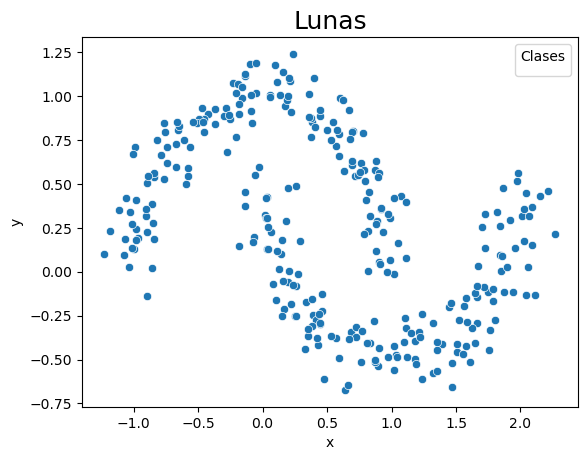

In [70]:
X_moon, y_moon = make_moons(n_samples=300, noise=0.1, random_state=42)

df_moon = pd.DataFrame({"x" : X_moon[:,0],
                        "y" : X_moon[:,1],
                        "class" : y_moon})

sns.scatterplot(data = df_moon, x = "x", y="y")
plt.title("Lunas", size = 18)
plt.legend(title= "Clases")
plt.plot()

### CJA con lo mejor que me haya funcionado

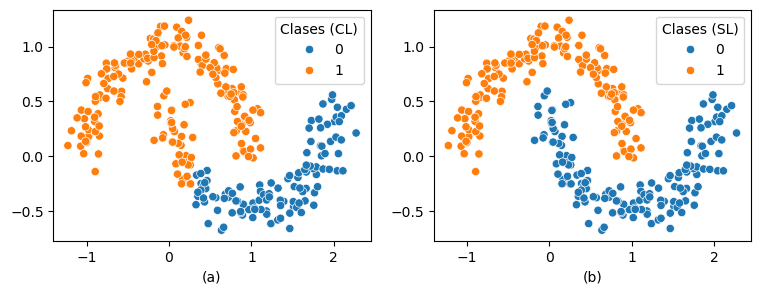

In [72]:
# En la tarea pasada descubrí que me funcionó bien la distancia euclidiana y el enlace
# tipo complete-linkage, el umbral depende de los datos así que no tomaré el resultado
# de la tarea pasada.
fig, ax = plt.subplots(1,2,figsize=(9,3))

labels_cja = jerarquico_aglomerativo(X_moon, enlace="complete-linkage")
df_moon["labels_cja"] = labels_cja
g1 = sns.scatterplot(data=df_moon, x="x", y="y", hue="labels_cja", ax=ax[0])

# Observamos que, en este caso, funciona mejor el single-linkage.
labels_cja = jerarquico_aglomerativo(X_moon, enlace="single-linkage")
df_moon["labels_cja"] = labels_cja
g2 = sns.scatterplot(data=df_moon, x="x", y="y", hue="labels_cja", ax=ax[1])

sns.move_legend(g1,loc="upper right" , title="Clases (CL)")
sns.move_legend(g2,loc="upper right" , title="Clases (SL)")
for i, letra in zip(list(range(2)), ["a","b"]):
    ax[i].set_xlabel(f"({letra})")
    ax[i].set_ylabel("")

plt.savefig("p3_cja.pdf", format="pdf", bbox_inches="tight")


### Fuzzy k-means

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(X_moon)
probs = np.round(fcm.soft_predict(X_moon),3)
lab = np.matrix(fcm.predict(X_moon)).T

df_moon_ja_cfm = pd.DataFrame(np.concatenate([df_moon,probs,lab], axis = 1), 
                              columns=list(df_moon.columns)+["p0","p1","labels_fcm"])

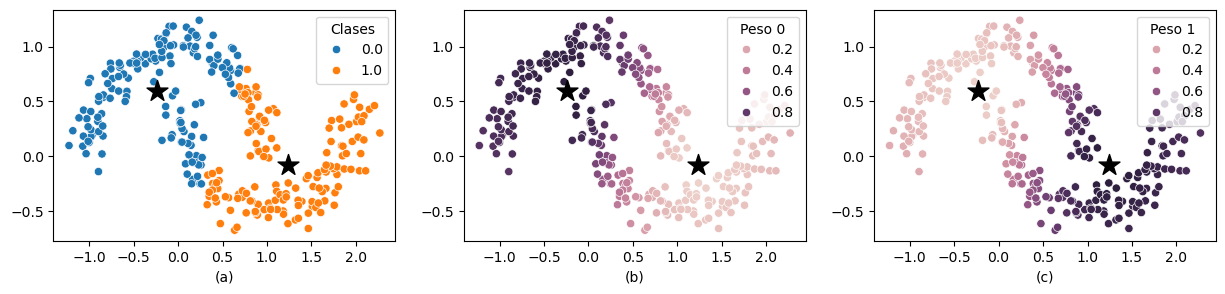

In [73]:
fig, ax = plt.subplots(1,3,figsize=(15,3))

g1 = sns.scatterplot(data = df_moon_ja_cfm,
                x = "x",
                y = "y",
                hue= "labels_fcm", ax = ax[0])
g2 = sns.scatterplot(data = df_moon_ja_cfm,
                x = "x",
                y = "y",
                hue= "p0", ax = ax[1])
g3 = sns.scatterplot(data = df_moon_ja_cfm,
                x = "x",
                y = "y",
                hue= "p1", ax = ax[2])

ax[0].scatter(x = fcm.centers[:,0], y = fcm.centers[:,1],
              s = 250, marker="*", color = "black")
ax[1].scatter(x = fcm.centers[:,0], y = fcm.centers[:,1],
              s = 250, marker="*", color = "black")
ax[2].scatter(x = fcm.centers[:,0], y = fcm.centers[:,1],
              s = 250, marker="*", color = "black")

sns.move_legend(g1,loc="upper right" , title="Clases")
sns.move_legend(g2,loc="upper right" , title="Peso 0")
sns.move_legend(g3,loc="upper right" , title="Peso 1")

for i, letra in zip(list(range(3)), ["a","b","c"]):
    ax[i].set_xlabel(f"({letra})")
    ax[i].set_ylabel("")

plt.savefig("p3_fcm.pdf", format="pdf", bbox_inches="tight")



## Problema 4

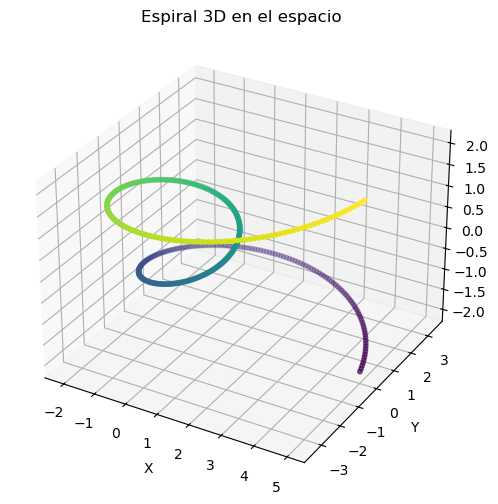

In [75]:
num_points = 500
theta = np.linspace(0, 4*np.pi, num_points)
z = np.linspace(-2,2,num_points)
r = z**2 + 1

x = r*np.cos(theta)
y = r*np.sin(theta)

spiral_points = np.vstack((x,y,z)).T

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x,y,z, c = theta, cmap="viridis", marker="o", s=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Espiral 3D en el espacio")
plt.show()


## Problema 5

In [128]:
num_samples = 1000
factor = 0.3
noise = 0.05

X_circles, y_circles = make_circles(n_samples=num_samples,
                                    factor=factor,
                                    noise=noise)
y_circles = y_circles + 2*(X_circles[:,0]>0)

In [127]:
y_circles + 2*(X_circles[:,0]>0)

array([1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 0, 3, 0, 2,
       0, 3, 0, 3, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 3, 3, 2, 2, 3, 1, 0,
       3, 0, 3, 1, 1, 3, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 3, 0, 3, 1, 0, 0,
       0, 2, 3, 3, 2, 1, 1, 0, 2, 3, 2, 2, 1, 0, 1, 3, 1, 0, 1, 1, 3, 3,
       3, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 3, 1, 3, 1, 2, 3, 1, 2, 1, 2, 0,
       0, 0, 3, 3, 0, 0, 0, 3, 1, 1, 3, 0, 2, 1, 1, 3, 3, 3, 3, 0, 0, 3,
       1, 3, 2, 3, 2, 1, 1, 1, 3, 2, 3, 0, 2, 3, 1, 1, 2, 0, 3, 3, 0, 1,
       1, 2, 2, 3, 1, 0, 1, 0, 3, 2, 2, 0, 3, 3, 1, 0, 0, 2, 3, 1, 1, 2,
       1, 1, 3, 0, 0, 0, 3, 3, 1, 0, 2, 3, 1, 0, 3, 2, 1, 3, 2, 3, 1, 2,
       2, 2, 1, 1, 3, 0, 3, 3, 3, 1, 3, 0, 1, 3, 2, 0, 2, 0, 3, 3, 1, 1,
       0, 3, 1, 0, 3, 1, 0, 2, 0, 1, 2, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 3,
       0, 3, 1, 2, 3, 0, 3, 2, 3, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 3, 2, 2,
       1, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 0, 1, 3, 0, 3, 3, 1, 0, 2, 0, 0,
       1, 1, 0, 1, 0, 2, 3, 2, 3, 0, 0, 2, 2, 3, 3,

In [117]:
num_samples = 1000
factor = 0.5
noise = 0.01

X_circles1, y_circles1 = make_circles(n_samples=num_samples,
                                    factor=factor,
                                    noise=noise)

X_circles2, y_circles2 = make_circles(n_samples=num_samples,
                                    factor=factor,
                                    noise=noise)
X_circles2 = X_circles2*(1/factor)**2
y_circles2 = np.where(y_circles2 > 0, 3, 4)

X_circles = np.concatenate([X_circles1, X_circles2], axis = 0)
y_circles = np.concatenate([y_circles1, y_circles2], axis = 0)

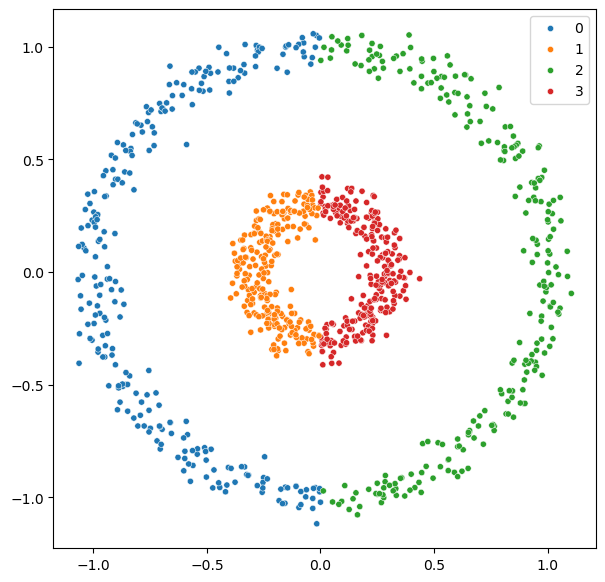

In [122]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=X_circles[:,0], y = X_circles[:,1], hue=y_circles,
                palette="tab10", s = 20)
plt.show()